In [1]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

os.listdir("dataset")

['Test', 'Train']

In [3]:
len(os.listdir("dataset/Train/Covid19 Positive"))

2531

The dataset is divided into three sets: 1) Train set 2) Validation set and 3) Test set.

# Data Visualization


In [2]:
train_dir = "dataset/Train"
test_dir = "dataset/Test"


print("Train set:\n========================================")
num_Covid19_Positive = len(os.listdir(os.path.join(train_dir, 'Covid19 Positive')))
num_Covid19_Negative = len(os.listdir(os.path.join(train_dir, 'Covid19 Negative')))
Pneumonia = len(os.listdir(os.path.join(train_dir, 'Pneumonia')))
print(f"Covid19 Positive={num_Covid19_Positive}")
print(f"Covid19 Negative={num_Covid19_Negative}")
print(f"Pneumonia={Pneumonia}")

print("Test set:\n========================================")
print(f"Covid19 Positive={len(os.listdir(os.path.join(test_dir, 'Covid19 Positive')))}")
print(f"Covid19 Negative={len(os.listdir(os.path.join(test_dir, 'Covid19 Negative')))}")

print(f"Pneumonia={len(os.listdir(os.path.join(test_dir, 'Pneumonia')))}")



Train set:
Covid19 Positive=2531
Covid19 Negative=7134
Pneumonia=943
Test set:
Covid19 Positive=1085
Covid19 Negative=3058
Pneumonia=402


Text(0.5, 1.0, 'Train')

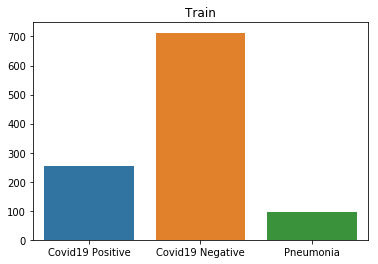

In [18]:
import seaborn as sns
my_dict = {'Covid19 Positive':'2531', 'Covid19 Negative' : '7134', 'Pneumonia' : '943'}

perc =  [float(i[:-1]) for i in my_dict.values()]
sns.barplot(x=list(my_dict.keys()),y=perc)
plt.title('Train Data')


Text(0.5, 1.0, 'Test Data')

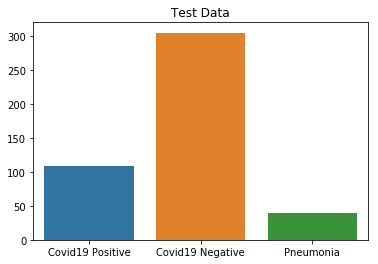

In [19]:
import seaborn as sns
my_dict = {'Covid19 Positive':'1085', 'Covid19 Negative' : '3058', 'Pneumonia' : '402'}

perc =  [float(i[:-1]) for i in my_dict.values()]
sns.barplot(x=list(my_dict.keys()),y=perc)
plt.title('Test Data')

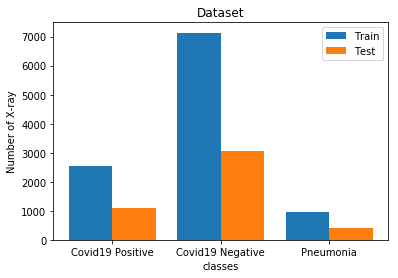

In [39]:

import numpy as np 
import matplotlib.pyplot as plt 
  
X = ['Covid19 Positive', 'Covid19 Negative', 'Pneumonia']
Ygirls = [2531,7134,943]
Zboys = [1085,3058,402]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Ygirls, 0.4, label = 'Train')
plt.bar(X_axis + 0.2, Zboys, 0.4, label = 'Test')
  
plt.xticks(X_axis, X)
plt.xlabel("classes")
plt.ylabel("Number of X-ray")
plt.title("Dataset")
plt.legend()
plt.show()

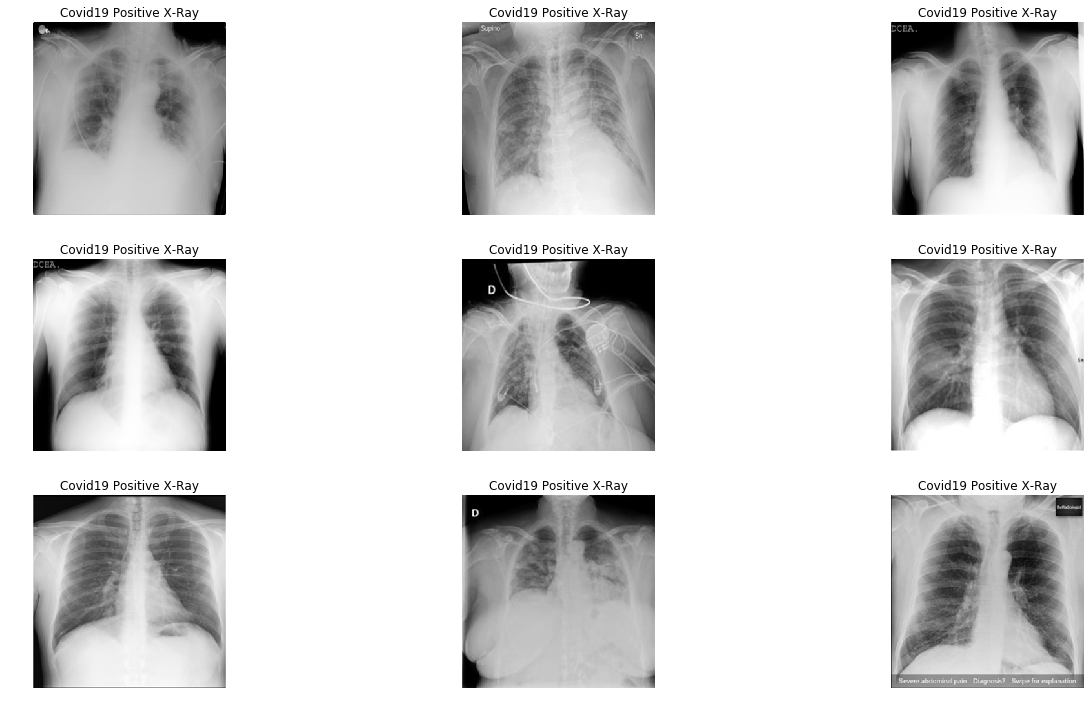

In [3]:
positive = os.listdir("dataset/Train/Covid19 Positive")
positive_dir = "dataset/train/Covid19 Positive"

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(positive_dir, positive[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title("Covid19 Positive X-Ray") 
    
plt.tight_layout()

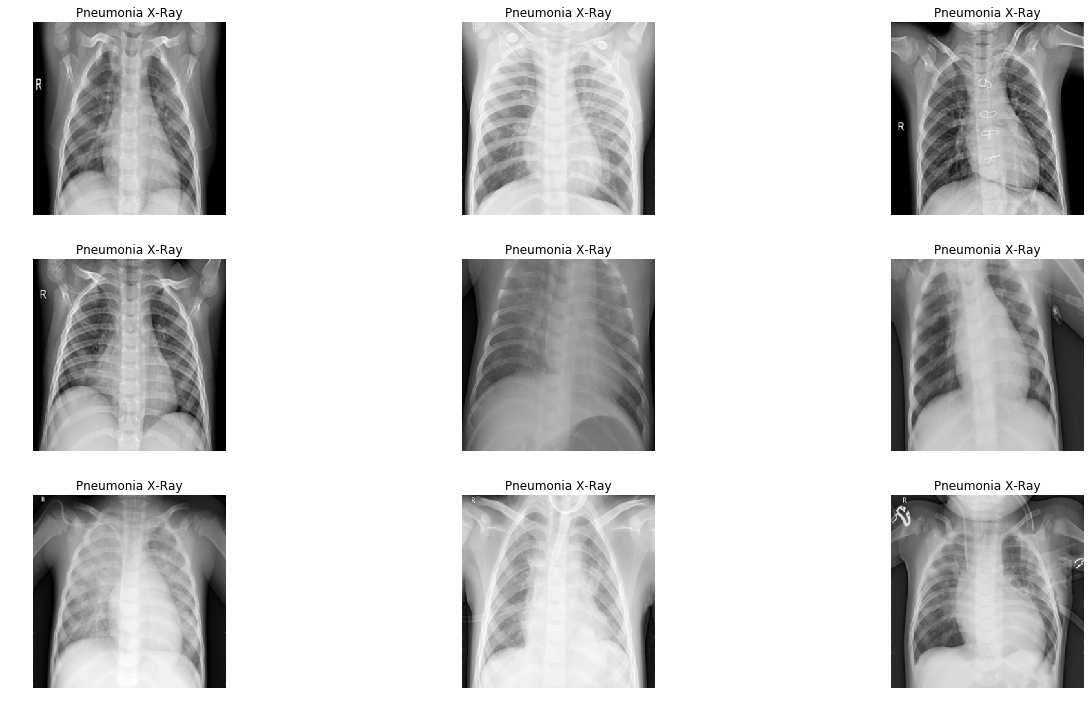

In [6]:
pneumonia = os.listdir("dataset/Train/Pneumonia")
pneumonia_dir = "dataset/Train/Pneumonia"

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(pneumonia_dir, pneumonia[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title("Pneumonia X-Ray") 
    
plt.tight_layout()

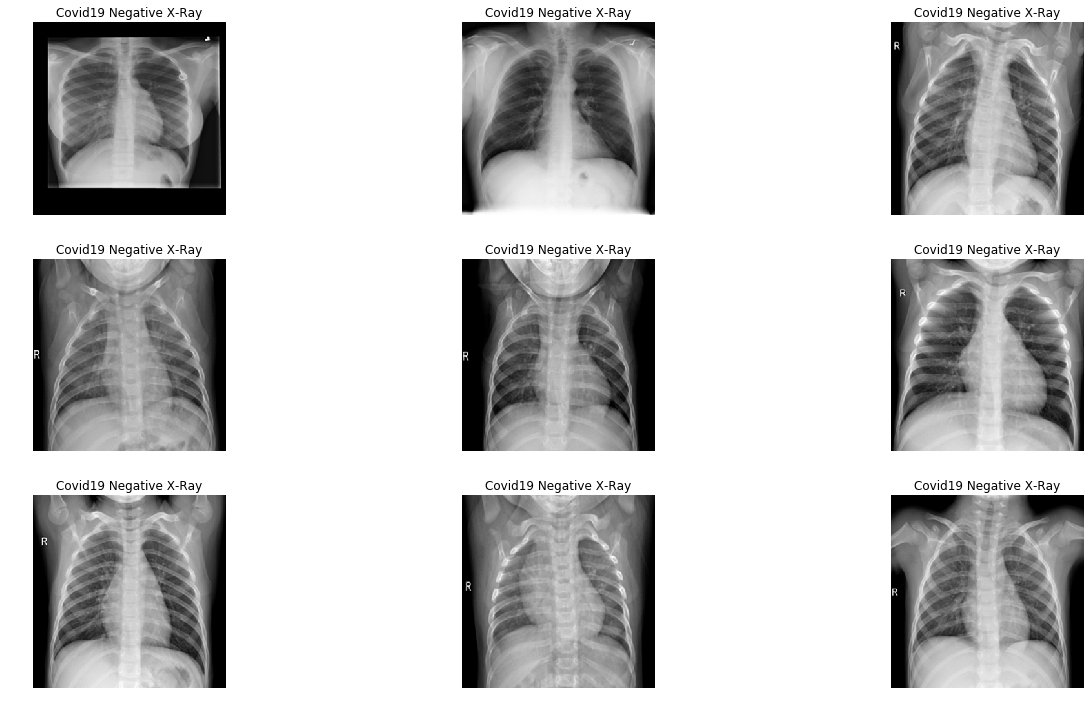

In [7]:
normal = os.listdir("dataset/Train/Covid19 Negative")
normal_dir = "dataset/Train/Covid19 Negative"

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(normal_dir, normal[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title("Covid19 Negative X-Ray") 
    
    
plt.tight_layout() 










The dimensions of the image are 299 pixels width and 299 pixels height, one single color channel.
The maximum pixel value is 1.0000 and the minimum is 0.0000
The mean value of the pixels is 0.3341 and the standard deviation is 0.2795


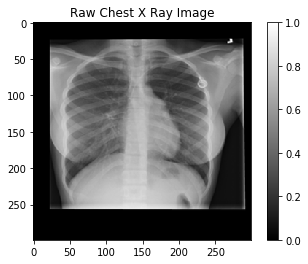

In [8]:
Covid19_Negative_img = os.listdir("dataset/Train/Covid19 Negative")[0]
Covid19_Negative_dir = "dataset/Train/Covid19 Negative"
sample_img = plt.imread(os.path.join(normal_dir,Covid19_Negative_img))
plt.imshow(sample_img, cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')

print(f"The dimensions of the image are {sample_img.shape[0]} pixels width and {sample_img.shape[1]} pixels height, one single color channel.")
print(f"The maximum pixel value is {sample_img.max():.4f} and the minimum is {sample_img.min():.4f}")
print(f"The mean value of the pixels is {sample_img.mean():.4f} and the standard deviation is {sample_img.std():.4f}")

# Ivestigate pixel value distribution

C:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, '# Pixels in Image')

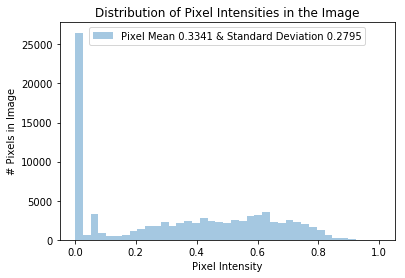

In [9]:
sns.distplot(sample_img.ravel(),
            label=f"Pixel Mean {np.mean(sample_img):.4f} & Standard Deviation {np.std(sample_img):.4f}", kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

In [4]:
from keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    samplewise_center=True,
    samplewise_std_normalization=True
)

Using TensorFlow backend.


In [5]:
train = image_generator.flow_from_directory(train_dir, 
                                            batch_size=8, 
                                            shuffle=True, 
                                            class_mode='categorical',
                                            target_size=(64,64))



test = image_generator.flow_from_directory(test_dir, 
                                            batch_size=1, 
                                            shuffle=False, 
                                            class_mode='categorical',
                                            target_size=(64,64))

Found 10608 images belonging to 3 classes.
Found 4545 images belonging to 3 classes.


In [6]:
import pandas as pd


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The dimensions of the image are 64 pixels width and 64 pixels height, one single color channel.
The maximum pixel value is 2.3355 and the minimum is -3.1211
The mean value of the pixels is 0.0000 and the standard deviation is 1.0000


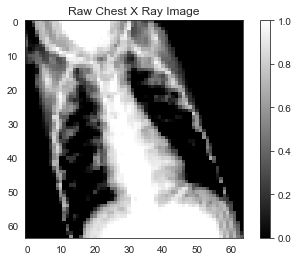

In [6]:
sns.set_style('white')
generated_image, label = train.__getitem__(0)
plt.imshow(generated_image[0], cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')

print(f"The dimensions of the image are {generated_image.shape[1]} pixels width and {generated_image.shape[2]} pixels height, one single color channel.")
print(f"The maximum pixel value is {generated_image.max():.4f} and the minimum is {generated_image.min():.4f}")
print(f"The mean value of the pixels is {generated_image.mean():.4f} and the standard deviation is {generated_image.std():.4f}")

Text(0, 0.5, '# Pixels in Image')

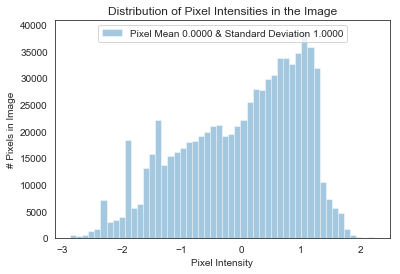

In [14]:
sns.distplot(generated_image.ravel(),
            label=f"Pixel Mean {np.mean(generated_image):.4f} & Standard Deviation {np.std(generated_image):.4f}", kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

In [17]:
# Class weights

weight_for_0 = num_Covid19_Positive / (num_Covid19_Negative + num_Covid19_Positive)
weight_for_1 = num_Covid19_Negative / (num_Covid19_Negative + num_Covid19_Positive)

class_weight = {0: weight_for_0, 1: weight_for_1}

print(f"Weight for class 0: {weight_for_0:.2f}")
print(f"Weight for class 1: {weight_for_1:.2f}")

Weight for class 0: 0.26
Weight for class 1: 0.74


In [10]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization


model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (180,180,3)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 3 , activation = 'sigmoid'))
model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])


In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 180, 180, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 180, 180, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 90, 90, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 90, 90, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 90, 90, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 90, 90, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 45, 45, 64)       

In [43]:
# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
#               loss=tf.keras.losses.BinaryCrossentropy(),
#               metrics=[tf.keras.metrics.BinaryAccuracy(),
#                        tf.keras.metrics.FalseNegatives()])

In [19]:
r = model.fit(
    train, 
    epochs=200,
    validation_data=test, 
    # class_weight=class_weight
    steps_per_epoch=300
    # 
)

Epoch 1/30
300/300 [==============================] - 289s 965ms/step - loss: 0.6515 - accuracy: 0.7789 - val_loss: 0.7764 - val_accuracy: 0.8071
Epoch 2/30
300/300 [==============================] - 260s 867ms/step - loss: 0.4049 - accuracy: 0.8235 - val_loss: 0.0029 - val_accuracy: 0.8083
Epoch 3/30
300/300 [==============================] - 262s 874ms/step - loss: 0.3524 - accuracy: 0.8550 - val_loss: 0.0037 - val_accuracy: 0.7396
Epoch 4/30
300/300 [==============================] - 260s 867ms/step - loss: 0.3645 - accuracy: 0.8662 - val_loss: 0.0012 - val_accuracy: 0.7930
Epoch 5/30
300/300 [==============================] - 256s 854ms/step - loss: 0.3297 - accuracy: 0.8797 - val_loss: 9.6261e-04 - val_accuracy: 0.8440
Epoch 6/30
300/300 [==============================] - 251s 837ms/step - loss: 0.3114 - accuracy: 0.8813 - val_loss: 0.0122 - val_accuracy: 0.8360
Epoch 7/30
300/300 [==============================] - 252s 839ms/step - loss: 0.2912 - accuracy: 0.8881 - val_loss: 6.37

Text(0.5, 1.0, 'Accuracy Evolution')

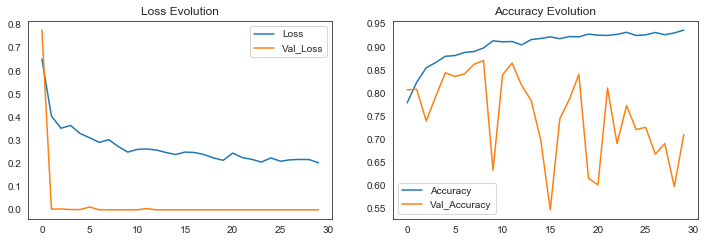

In [20]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [21]:
evaluation = model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

4545/4545 [==============================] - 107s 24ms/step
Test Accuracy: 70.99%
1326/1326 [==============================] - 224s 169ms/step
Train Accuracy: 69.55%


In [1]:
from sklearn.metrics import confusion_matrix, classification_report

pred = model.predict(test)

print(confusion_matrix(test.classes, pred > 0.5))
pd.DataFrame(classification_report(test.classes, pred > 0.5, output_dict=True))

In [18]:
print(confusion_matrix(test.classes, pred > 0.7))
pd.DataFrame(classification_report(test.classes, pred > 0.7, output_dict=True))

[[2330  218]
 [ 595  309]]


,0,1,micro avg,macro avg,weighted avg
precision,0.796581,0.586338,0.764484,0.691459,0.741523
recall,0.914443,0.341814,0.764484,0.628128,0.764484
f1-score,0.851453,0.431866,0.764484,0.641659,0.741572
support,2548.000000,904.000000,3452.000000,3452.000000,3452.000000


In [ ]:
from tensorflow.keras.models import load_model

model.save('Cnn.h5')

# Transfer Learning
# DenseNet

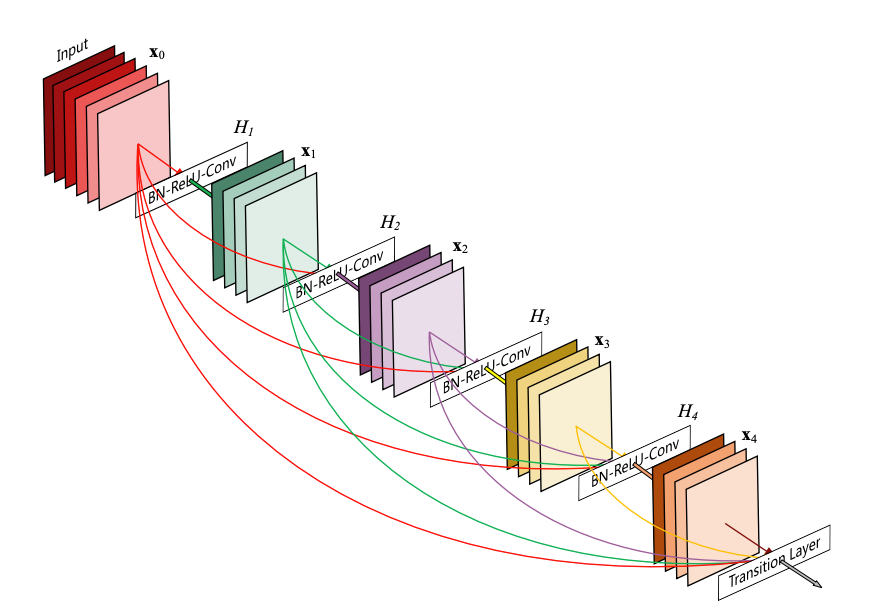

In [8]:
from keras.applications.densenet import DenseNet121
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras import backend as K

base_model = DenseNet121(input_shape=(180, 180, 3), include_top=False, weights='imagenet', pooling='avg')

base_model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 180, 180, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 186, 186, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 90, 90, 64)   9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 90, 90, 64)   256         conv1/conv[0][0]                 
________________________________________________________________________________________

In [9]:
layers = base_model.layers
print(f"The model has {len(layers)} layers")

The model has 428 layers


In [10]:
print(f"The input shape {base_model.input}")
print(f"The output shape {base_model.output}")

The input shape Tensor("input_1:0", shape=(None, 180, 180, 3), dtype=float32)
The output shape Tensor("avg_pool/Mean:0", shape=(None, 1024), dtype=float32)


In [13]:

#model = Sequential()
base_model = DenseNet121(include_top=False, weights='imagenet')
x = base_model.output

x = GlobalAveragePooling2D()(x)

predictions = Dense(3, activation="sigmoid")(x)

model = Model(inputs=base_model.input, outputs=predictions)
#model.add(base_model)
#model.add(GlobalAveragePooling2D())
#model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [20]:
from math import *

In [17]:
# r = model.fit(
#     train, 
#     epochs=100,
#     validation_data=test,
#     steps_per_epoch=50
    
# )

Epoch 1/100
50/50 [==============================] - 256s 5s/step - loss: 0.4217 - accuracy: 0.8217 - val_loss: 2.4705 - val_accuracy: 0.7874
Epoch 2/100
49/50 [============================>.] - ETA: 0s - loss: 0.3067 - accuracy: 0.8759

KeyboardInterrupt: 

Text(0.5, 1.0, 'Accuracy Evolution')

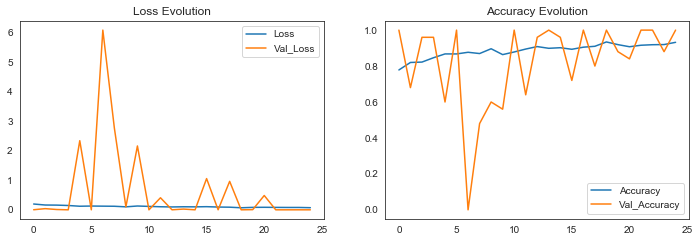

In [24]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [25]:
evaluation = model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

3452/3452 [==============================] - 468s 136ms/step
Test Accuracy: 86.30%
1165/1165 [==============================] - 873s 749ms/step
Train Accuracy: 92.76%


# Evaluation

In [26]:
predicted_vals = model.predict(test, steps=len(test))

In [27]:
print(confusion_matrix(test.classes, predicted_vals > 0.5))
pd.DataFrame(classification_report(test.classes, predicted_vals > 0.5, output_dict=True))

[[2265  283]
 [ 145  759]]


,0,1,micro avg,macro avg,weighted avg
precision,0.939834,0.728407,0.876014,0.834120,0.884466
recall,0.888932,0.839602,0.876014,0.864267,0.876014
f1-score,0.913675,0.780062,0.876014,0.846868,0.878685
support,2548.000000,904.000000,3452.000000,3452.000000,3452.000000


In [ ]:
model.save('desnet.h5')

In [ ]:
##


# VGG16


In [19]:
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D
from keras.applications import VGG16


vgg16_base_model = VGG16(input_shape=(64,64,3),include_top=False,weights='imagenet')

    


In [12]:
vgg16_base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 180, 180, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 180, 180, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 180, 180, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 90, 90, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 90, 90, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 90, 90, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 45, 45, 128)       0     

In [23]:

vgg16_model = Sequential([
        vgg16_base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation="relu"),
        BatchNormalization(),
        Dropout(0.6),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dropout(0.4),
        Dense(64,activation="relu"),
        BatchNormalization(),
        Dropout(0.3),
        Dense(3,activation="sigmoid")
    ])
    
model = Sequential()
model.add(vgg16_model.layers[0])


In [24]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
vgg16_model.compile(optimizer=opt,loss='binary_crossentropy',metrics=METRICS)

In [26]:
r = vgg16_model.fit(
    train, 
    epochs=100,
    validation_data=test, 
    # class_weight=class_weight,
    steps_per_epoch=300
)



Epoch 1/100
300/300 [==============================] - 302s 1s/step - loss: 0.6701 - accuracy: 0.6626 - precision: 0.4219 - recall: 0.5430 - val_loss: 1.3308 - val_accuracy: 0.2169 - val_precision: 0.2422 - val_recall: 0.3587
Epoch 2/100
300/300 [==============================] - 283s 943ms/step - loss: 0.5317 - accuracy: 0.7478 - precision: 0.2701 - recall: 0.4262 - val_loss: 0.8180 - val_accuracy: 0.5768 - val_precision: 0.2930 - val_recall: 0.3878
Epoch 3/100
300/300 [==============================] - 276s 920ms/step - loss: 0.4991 - accuracy: 0.7636 - precision: 0.3188 - recall: 0.3781 - val_loss: 0.2709 - val_accuracy: 0.7398 - val_precision: 0.3769 - val_recall: 0.4296
Epoch 4/100
300/300 [==============================] - 281s 936ms/step - loss: 0.4689 - accuracy: 0.7850 - precision: 0.4038 - recall: 0.4481 - val_loss: 1.9301 - val_accuracy: 0.5688 - val_precision: 0.4106 - val_recall: 0.4453
Epoch 5/100
300/300 [==============================] - 278s 928ms/step - loss: 0.4613 -

Text(0.5, 1.0, 'Accuracy Evolution')

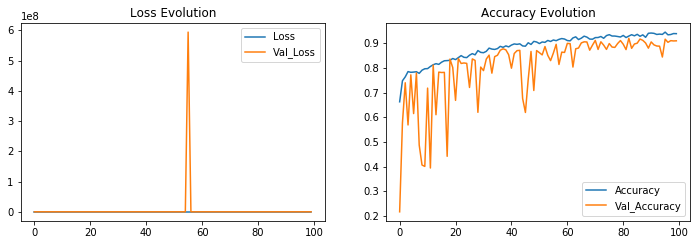

In [27]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [28]:
evaluation =vgg16_model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = vgg16_model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

4545/4545 [==============================] - 118s 26ms/step
Test Accuracy: 91.32%
1326/1326 [==============================] - 196s 148ms/step
Train Accuracy: 94.43%


In [ ]:
model.save('vgg16.h5')

# ResNet

See the full explanation and schemes in the Research Paper on Deep Residual Learning (https://arxiv.org/pdf/1512.03385.pdf)

In [7]:
from keras.applications import ResNet50

resnet_base_model = ResNet50(input_shape=(180,180,3), include_top=False, weights='imagenet')



C:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [8]:
resnet_base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 180, 180, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 186, 186, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 90, 90, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 90, 90, 64)   256         conv1[0][0]                      
___________________________________________________________________________________________

In [9]:
resnet_model = Sequential([
        resnet_base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation="relu"),
        BatchNormalization(),
        Dropout(0.6),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dropout(0.4),
        Dense(64,activation="relu"),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1,activation="sigmoid")
    ])
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
resnet_model.compile(optimizer=opt,loss='binary_crossentropy',metrics=METRICS)

NameError: name 'Sequential' is not defined

In [18]:
r = resnet_model.fit(
   train, 
    epochs=30,
    validation_data=test, 
    # class_weight=class_weight
    steps_per_epoch=300)


Epoch 1/25
300/300 [==============================] - 648s 2s/step - loss: 0.3277 - accuracy: 0.5046 - precision: 0.2754 - recall: 0.5312 - val_loss: 1.0383 - val_accuracy: 0.0000e+00 - val_precision: 0.2568 - val_recall: 0.5140
Epoch 2/25
300/300 [==============================] - 640s 2s/step - loss: 0.3009 - accuracy: 0.5252 - precision: 0.2628 - recall: 0.5175 - val_loss: 0.9235 - val_accuracy: 0.8400 - val_precision: 0.2704 - val_recall: 0.5196
Epoch 3/25
300/300 [==============================] - 660s 2s/step - loss: 0.2789 - accuracy: 0.5533 - precision: 0.2759 - recall: 0.5265 - val_loss: 0.4586 - val_accuracy: 0.8400 - val_precision: 0.2830 - val_recall: 0.5317
Epoch 4/25
300/300 [==============================] - 661s 2s/step - loss: 0.2771 - accuracy: 0.5446 - precision: 0.2844 - recall: 0.5311 - val_loss: 0.1425 - val_accuracy: 0.6400 - val_precision: 0.2862 - val_recall: 0.5317
Epoch 5/25
300/300 [==============================] - 660s 2s/step - loss: 0.2755 - accuracy: 0.

Text(0.5, 1.0, 'Accuracy Evolution')

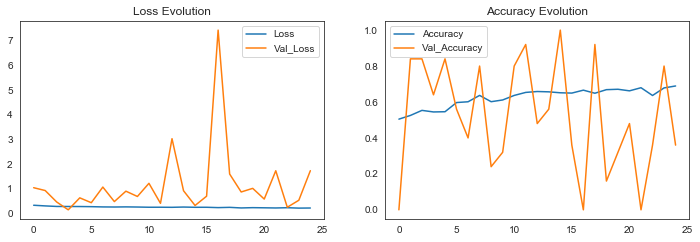

In [19]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

# Evaluation

In [20]:
evaluation =resnet_model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = resnet_model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

3452/3452 [==============================] - 393s 114ms/step
Test Accuracy: 45.10%
1165/1165 [==============================] - 850s 729ms/step
Train Accuracy: 46.55%


In [21]:
model.save('resnet.h5')

# CNN With SVM

In [10]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.7
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config) 
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [11]:

# Importing the libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2

In [14]:
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=128,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer and pooling layer
cnn.add(tf.keras.layers.Conv2D(filters=64,padding='same',kernel_size=5, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a third convolutional layer and pooling layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=7, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a 4th convolutional layer and pooling layer
cnn.add(tf.keras.layers.Conv2D(filters=16,padding='same',kernel_size=9, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
#cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
# cnn.add(Dropout(0.2))
## For Binary Classification
cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation='linear'))

In [15]:
## for mulitclassification
# cnn.add(Dense(4, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation='softmax'))
cnn.compile(optimizer = 'adam', loss = 'squared_hinge')

In [16]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 128)       3584      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)        204864    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 8, 8, 32)          100384    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 16)         

In [17]:
# Part 3 - Training the CNN

# Compiling the CNN

# cnn.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
# checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

# Training the CNN on the Training set and evaluating it on the Test set
r=cnn.fit(x = train, validation_data = test, epochs = 30)

NameError: name 'train' is not defined

# Evaluation

In [24]:
evaluation = cnn.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = cnn.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

108/108 [==============================] - 8s 70ms/step - loss: 0.1541 - accuracy: 0.9580
Test Accuracy: 95.80%
324/324 [==============================] - 32s 98ms/step - loss: 0.0546 - accuracy: 0.9811
Train Accuracy: 98.11%


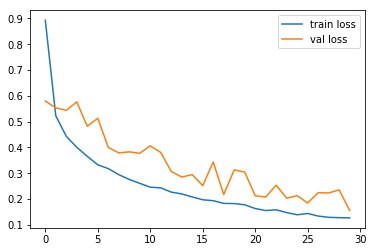

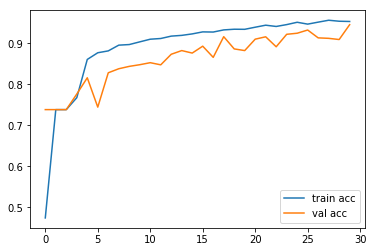

<Figure size 432x288 with 0 Axes>

In [14]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [36]:
# save it as a h5 file


from tensorflow.keras.models import load_model

# cnn.save('SvmAndCnn.h5')
cnn.save('SvmAndCnn.h5')
from tensorflow.keras.models import load_model
 


## Comparing different models

In [6]:
model_mae_scores_dict = {'CNN': 94.16, 'DenseNet' : 98.48, 'VGG16' : 71.01, 'ResNet' : 78.55,'CNN with SVM':98.72,'SVM':76.07}
model_mae_scores = pd.Series(model_mae_scores_dict)
model_mae_scores


CNN             94.16
DenseNet        98.48
VGG16           71.01
ResNet          78.55
CNN with SVM    98.72
SVM             76.07
dtype: float64

In [14]:
order = model_mae_scores.sort_values()


Text(0.5, 1.0, 'Train Accuracy')

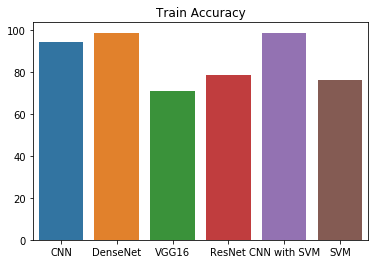

In [3]:
import seaborn as sns
my_dict = {'CNN': '94.16', 'DenseNet' : '98.48', 'VGG16' : '71.01', 'ResNet' : '78.55','CNN with SVM':'98.72','SVM':'76.07'}
perc =  [float(i[:-1]) for i in my_dict.values()]
sns.barplot(x=list(my_dict.keys()),y=perc)
plt.title('Train Accuracy')

Text(0.5, 1.0, 'Test Accuracy')

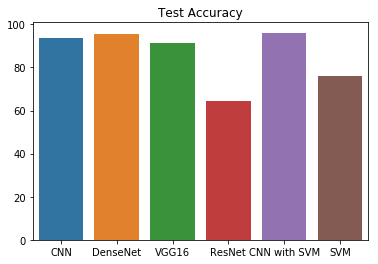

In [4]:
import seaborn as sns
my_dict = {'CNN': '93.82', 'DenseNet' : '95.52', 'VGG16' : '91.32', 'ResNet' : '64.55','CNN with SVM':'96.11','SVM':'76.07'}
perc =  [float(i[:-1]) for i in my_dict.values()]
sns.barplot(x=list(my_dict.keys()),y=perc)
plt.title('Test Accuracy')

In [2]:
from matplotlib import pyplot
import seaborn as sns

sns.set_theme(style="darkgrid")
# sns.set_context('paper')
sns.set(rc={'figure.figsize':(16,8)})
sns.barplot(x=order.values, y = order.index,orient="h")
# sns.barplot(x=order.index,y=order.index,orient="h")

plt.xticks(rotation=1,fontsize=15)
plt.title('Accuracy of All model')